# IMPORT THE NECCESSARY LIABRARIES


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# READ THE DATA 


In [2]:
df = pd.read_csv("Suicides in India 2001-2012.csv")
df.head()

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0

# TAKING THE OBSERVATION OF THE DATA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


# STATISTICAL OBSERVATION OF THE DATA 

In [4]:
df.describe().astype(int)

Year   Total
count  237519  237519
mean     2006      55
std         3     792
min      2001       0
25%      2004       0
50%      2007       0
75%      2010       6
max      2012   63343

# Trend Analysis

## Total Suicides Over Time

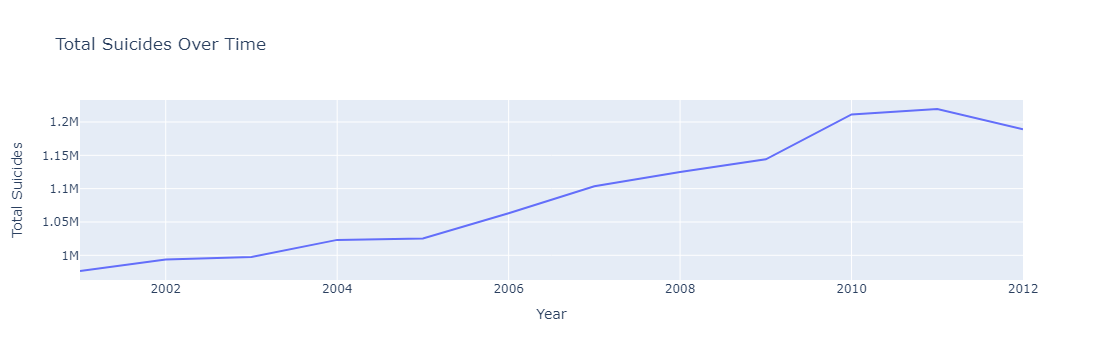

In [5]:

# Aggregate the total suicides by year
total_suicides_per_year = df.groupby('Year')['Total'].sum().reset_index()

# Plot total suicides over time
fig_total_suicides = px.line(
    total_suicides_per_year,
    x='Year',
    y='Total',
    title='Total Suicides Over Time',
    labels={'Total': 'Total Suicides'}
)

# Display the plots
fig_total_suicides.show()


## Type-wise Trends

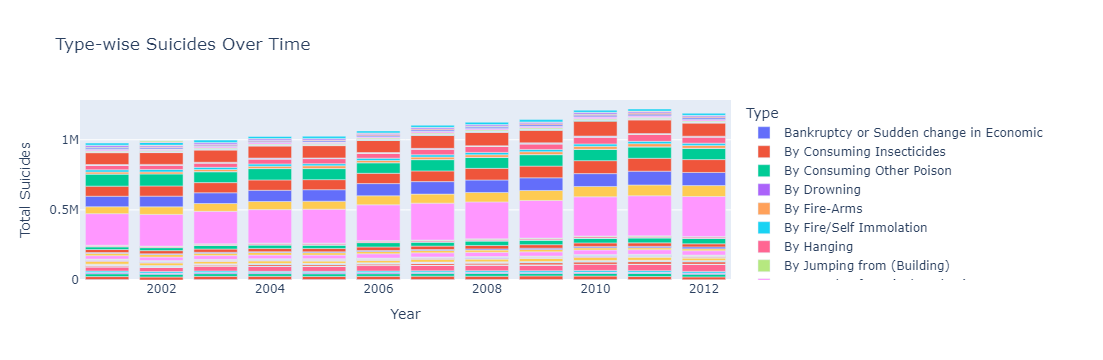

In [6]:
# Aggregate the total suicides by year and type
type_wise_suicides_per_year = df.groupby(['Year', 'Type'])['Total'].sum().reset_index()

# Plot type-wise trends over time
fig_type_wise_suicides = px.bar(
    type_wise_suicides_per_year,
    x='Year',
    y='Total',
    color='Type',
    title='Type-wise Suicides Over Time',
    labels={'Total': 'Total Suicides'}
)

fig_type_wise_suicides.show()

# Geographical Analysis

## State-wise Distribution

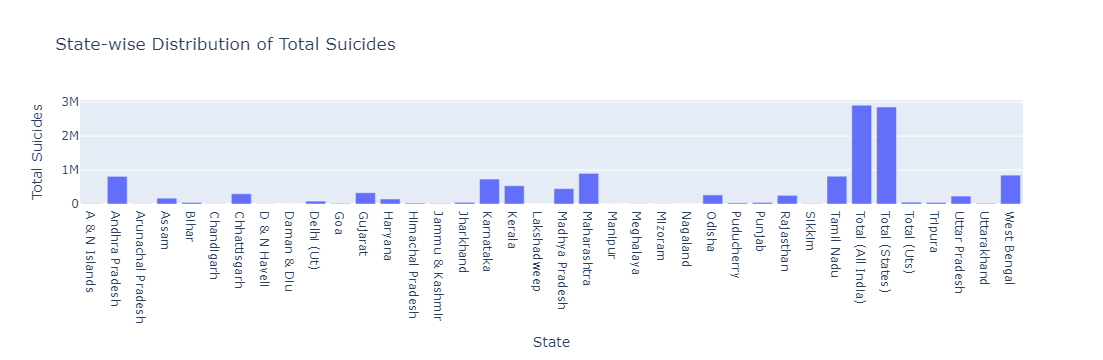

In [7]:
# Aggregate total suicides by state
state_total_suicides = df.groupby('State')['Total'].sum().reset_index()

# Plot state-wise distribution of total suicides
fig_state_distribution = px.bar(
    state_total_suicides,
    x='State',
    y='Total',
    title='State-wise Distribution of Total Suicides',
    labels={'Total': 'Total Suicides', 'State': 'State'}    
)

# Display the plot
fig_state_distribution.show()

## State- Wise Trends

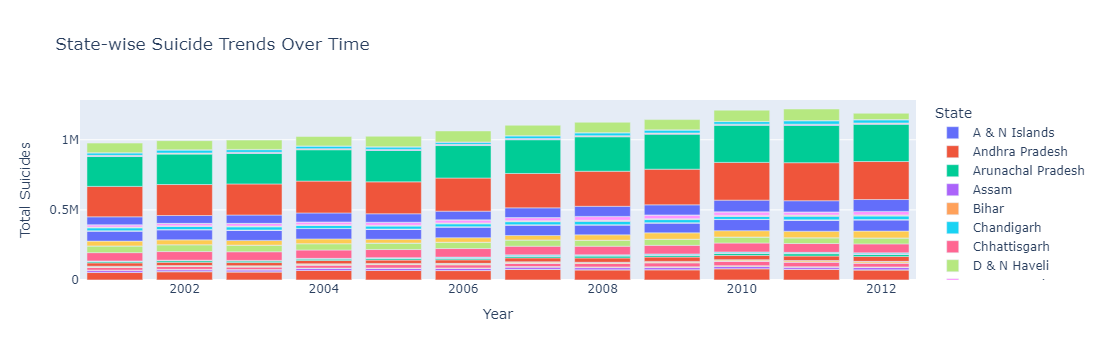

In [8]:
# Aggregate total suicides by state and year
state_trends = df.groupby(['State', 'Year'])['Total'].sum().reset_index()

# Plot state trends over years
fig_state_trends = px.bar(
    state_trends,
    x='Year',
    y='Total',
    color='State',
    title='State-wise Suicide Trends Over Time',
    labels={'Total': 'Total Suicides', 'Year': 'Year', 'State': 'State'}
)

# Display the plot
fig_state_trends.show()

# Demographic Analysis

## Gender Distribution

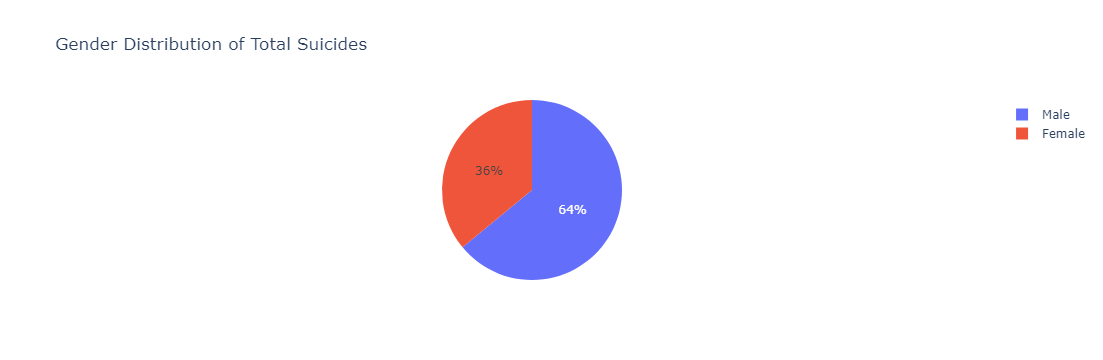

In [9]:
# Aggregate total suicides by gender
gender_total_suicides = df.groupby('Gender')['Total'].sum().reset_index()

# Plot gender distribution of total suicides
fig_gender_distribution = px.pie(
    gender_total_suicides,
    values='Total',
    names='Gender',
    title='Gender Distribution of Total Suicides',
    labels={'Total': 'Total Suicides', 'Gender': 'Gender'}
)

# Display the plot
fig_gender_distribution.show()

## Age Group Distribution

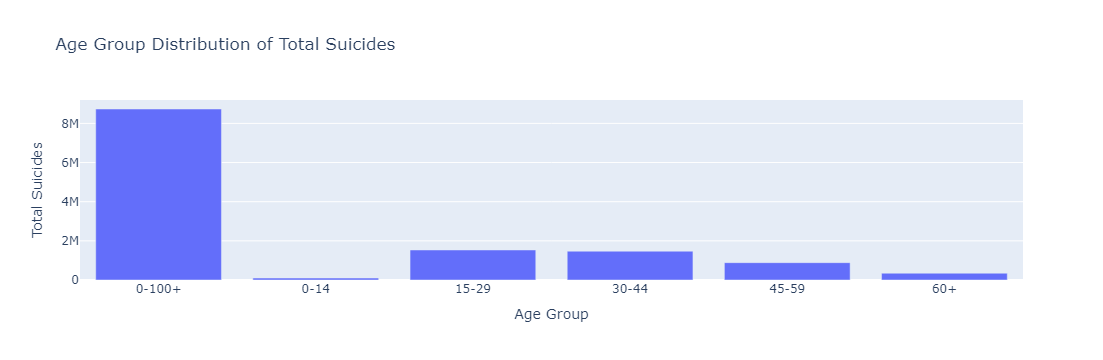

In [10]:

# Aggregate total suicides by age group
age_group_total_suicides = df.groupby('Age_group')['Total'].sum().reset_index()

# Plot age group distribution of total suicides
fig_age_group_distribution = px.bar(
    age_group_total_suicides,
    x='Age_group',
    y='Total',
    title='Age Group Distribution of Total Suicides',
    labels={'Total': 'Total Suicides', 'Age_group': 'Age Group'}
)

# Display the plot
fig_age_group_distribution.show()

# Type Analysis

## Type Distribution

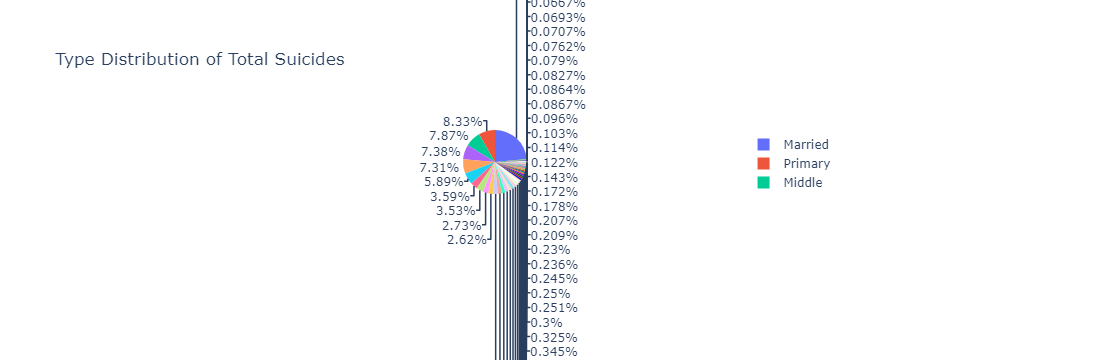

In [11]:

# Aggregate total suicides by type
type_total_suicides = df.groupby('Type')['Total'].sum().reset_index()

# Plot type distribution of total suicides
fig_type_distribution = px.pie(
    type_total_suicides,
    values='Total',
    names='Type',
    title='Type Distribution of Total Suicides',
    labels={'Total': 'Total Suicides', 'Type': 'Type'}
)

# Display the plot
fig_type_distribution.show()

## Type by Gender and Age Group

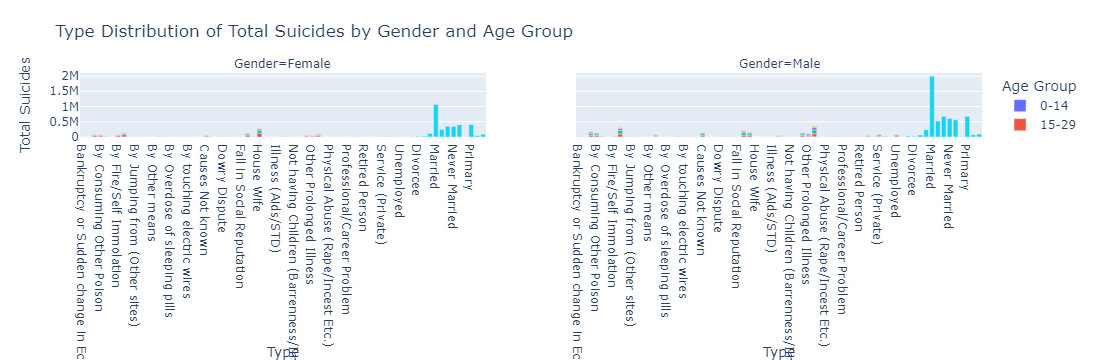

In [12]:

# Aggregate total suicides by type, gender, and age group
type_gender_age_total_suicides = df.groupby(['Type', 'Gender', 'Age_group'])['Total'].sum().reset_index()

# Plot type by gender and age group distribution of total suicides using a stacked bar chart
fig_type_gender_age_distribution = px.bar(
    type_gender_age_total_suicides,
    x='Type',
    y='Total',
    color='Age_group',
    facet_col='Gender',
    title='Type Distribution of Total Suicides by Gender and Age Group',
    labels={'Total': 'Total Suicides', 'Type': 'Type', 'Age_group': 'Age Group', 'Gender': 'Gender'},
    facet_col_spacing=0.1  # Space between facet columns
)

# Display the plot
fig_type_gender_age_distribution.show()

# Cross-sectional Analysis

## Year and Gender

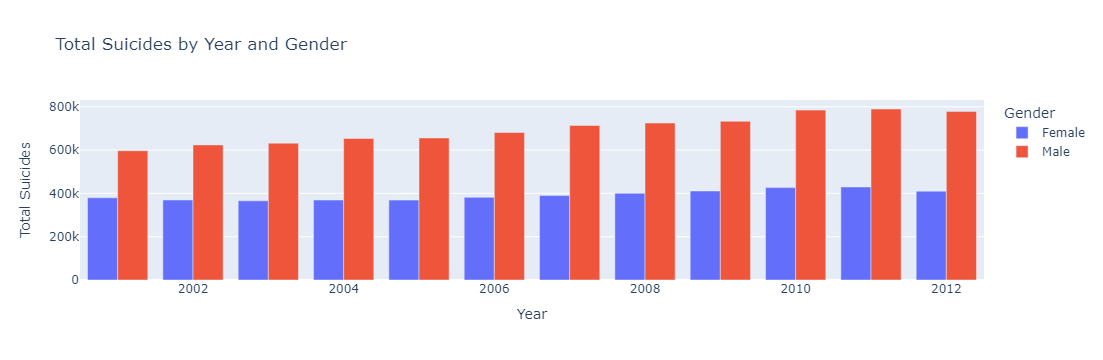

In [13]:

# Aggregate total suicides by year and gender
year_gender_total_suicides = df.groupby(['Year', 'Gender'])['Total'].sum().reset_index()

# Plot year and gender analysis of total suicides using a grouped bar chart
fig_year_gender_analysis = px.bar(
    year_gender_total_suicides,
    x='Year',
    y='Total',
    color='Gender',
    title='Total Suicides by Year and Gender',
    labels={'Total': 'Total Suicides', 'Year': 'Year', 'Gender': 'Gender'},
    barmode='group'  # Grouped bars
)

# Display the plot
fig_year_gender_analysis.show()

## Age Group and Year

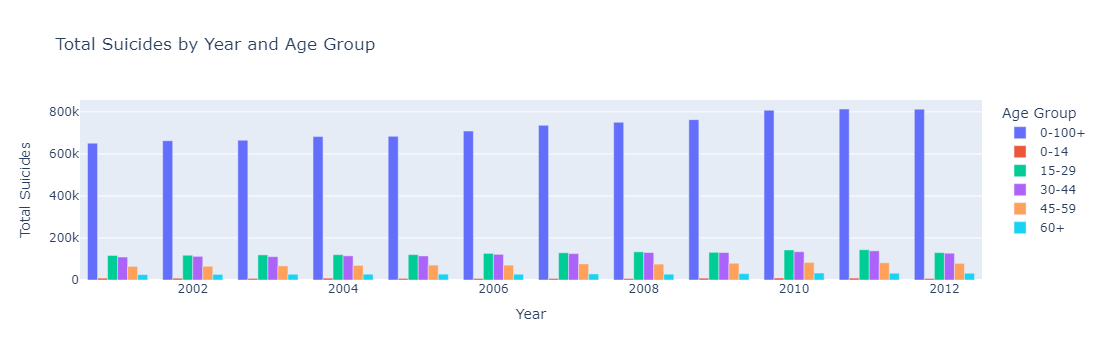

In [14]:

# Aggregate total suicides by year and age group
year_age_group_total_suicides = df.groupby(['Year', 'Age_group'])['Total'].sum().reset_index()

# Plot year and age group analysis of total suicides using a grouped bar chart
fig_year_age_group_analysis = px.bar(
    year_age_group_total_suicides,
    x='Year',
    y='Total',
    color='Age_group',
    title='Total Suicides by Year and Age Group',
    labels={'Total': 'Total Suicides', 'Year': 'Year', 'Age_group': 'Age Group'},
    barmode='group'  # Grouped bars
)

# Display the plot
fig_year_age_group_analysis.show()

# Proportional Analysis

## Proportion of Types by State

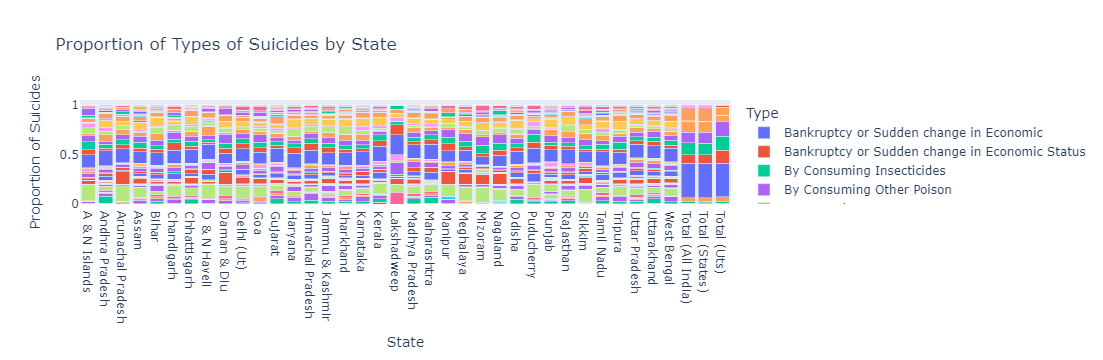

In [15]:

# Aggregate total suicides by state and type
state_type_total_suicides = df.groupby(['State', 'Type'])['Total'].sum().reset_index()

# Calculate total suicides per state for normalization
state_total_suicides = df.groupby('State')['Total'].sum().reset_index()

# Merge to calculate proportions
state_type_total_suicides = pd.merge(state_type_total_suicides, state_total_suicides, on='State', suffixes=('', '_total'))

# Calculate proportion of each type by state
state_type_total_suicides['Proportion'] = state_type_total_suicides['Total'] / state_type_total_suicides['Total_total']

# Plot proportion of types by state using a stacked bar chart
fig_types_by_state = px.bar(
    state_type_total_suicides,
    x='State',
    y='Proportion',
    color='Type',
    title='Proportion of Types of Suicides by State',
    labels={'Proportion': 'Proportion of Suicides', 'State': 'State', 'Type': 'Type'},
    barmode='stack'  # Stacked bars to show proportions within each state
)

# Display the plot
fig_types_by_state.show()

## Proportion of Age Groups by Type

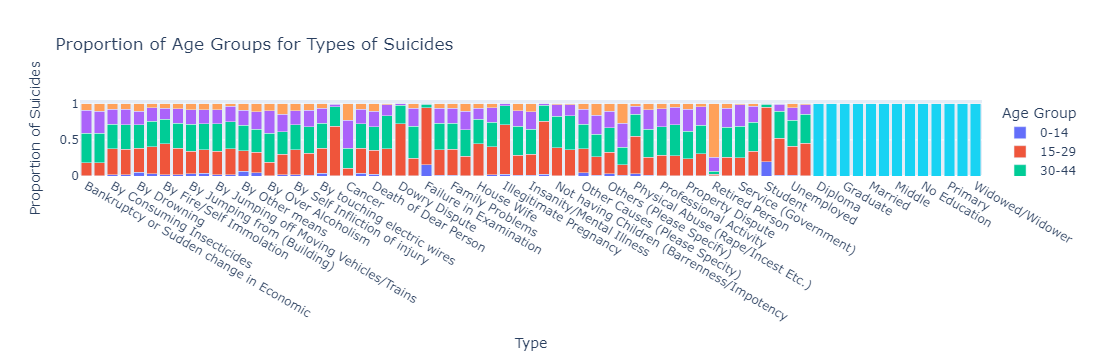

In [16]:

# Aggregate total suicides by type and age group
type_age_group_total_suicides = df.groupby(['Type', 'Age_group'])['Total'].sum().reset_index()

# Calculate total suicides per type for normalization
type_total_suicides = df.groupby('Type')['Total'].sum().reset_index()

# Merge to calculate proportions
type_age_group_total_suicides = pd.merge(type_age_group_total_suicides, type_total_suicides, on='Type', suffixes=('', '_total'))

# Calculate proportion of each age group by type
type_age_group_total_suicides['Proportion'] = type_age_group_total_suicides['Total'] / type_age_group_total_suicides['Total_total']

# Plot proportion of age groups by type using a stacked bar chart
fig_age_groups_by_type = px.bar(
    type_age_group_total_suicides,
    x='Type',
    y='Proportion',
    color='Age_group',
    title='Proportion of Age Groups for Types of Suicides',
    labels={'Proportion': 'Proportion of Suicides', 'Type': 'Type', 'Age_group': 'Age Group'},
    barmode='stack'  # Stacked bars to show proportions within each type
)

# Display the plot
fig_age_groups_by_type.show()

# Advanced Analysis

## Correlation analysis

                     Total  Gender_Female  Gender_Male  Age_group_0-100+  \
Total             1.000000      -0.019399     0.019399          0.197126   
Gender_Female    -0.019399       1.000000    -1.000000          0.000231   
Gender_Male       0.019399      -1.000000     1.000000         -0.000231   
Age_group_0-100+  0.197126       0.000231    -0.000231          1.000000   
Age_group_0-14   -0.032243       0.000476    -0.000476         -0.110859   
Age_group_15-29  -0.012915       0.000177    -0.000177         -0.111156   
Age_group_30-44  -0.013741      -0.000188     0.000188         -0.111111   
Age_group_45-59  -0.021649      -0.000350     0.000350         -0.111039   
Age_group_60+    -0.028899      -0.000243     0.000243         -0.110930   

                  Age_group_0-14  Age_group_15-29  Age_group_30-44  \
Total                  -0.032243        -0.012915        -0.013741   
Gender_Female           0.000476         0.000177        -0.000188   
Gender_Male            -0.000

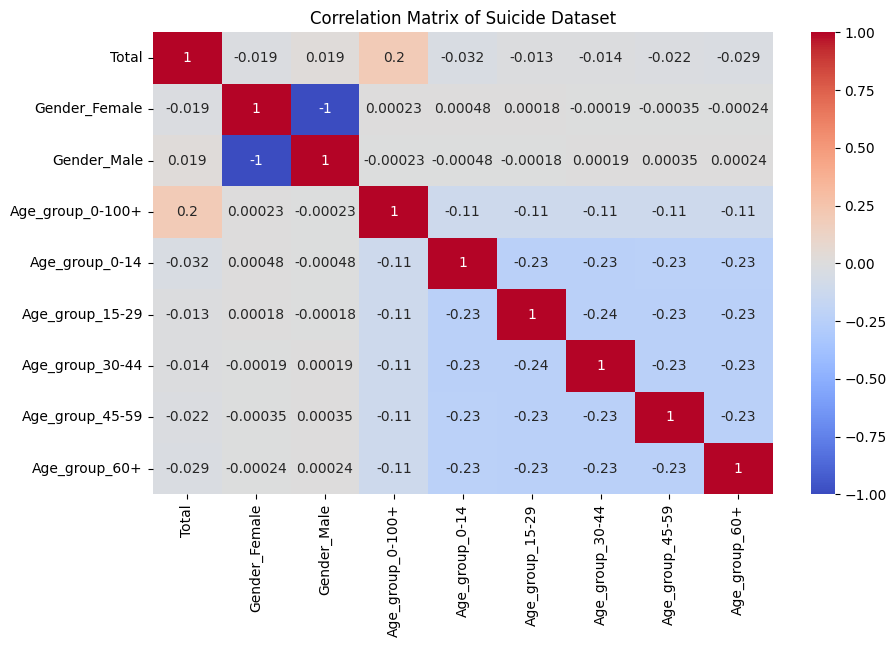

In [17]:
# Focus on relevant columns for correlation analysis
df_relevant = df[['Gender', 'Age_group', 'Total']]

# Encode categorical variables for correlation calculation
df_encoded = pd.get_dummies(df_relevant, columns=['Gender', 'Age_group'])

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

print(corr_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Suicide Dataset')
plt.show()

## cluster analysis

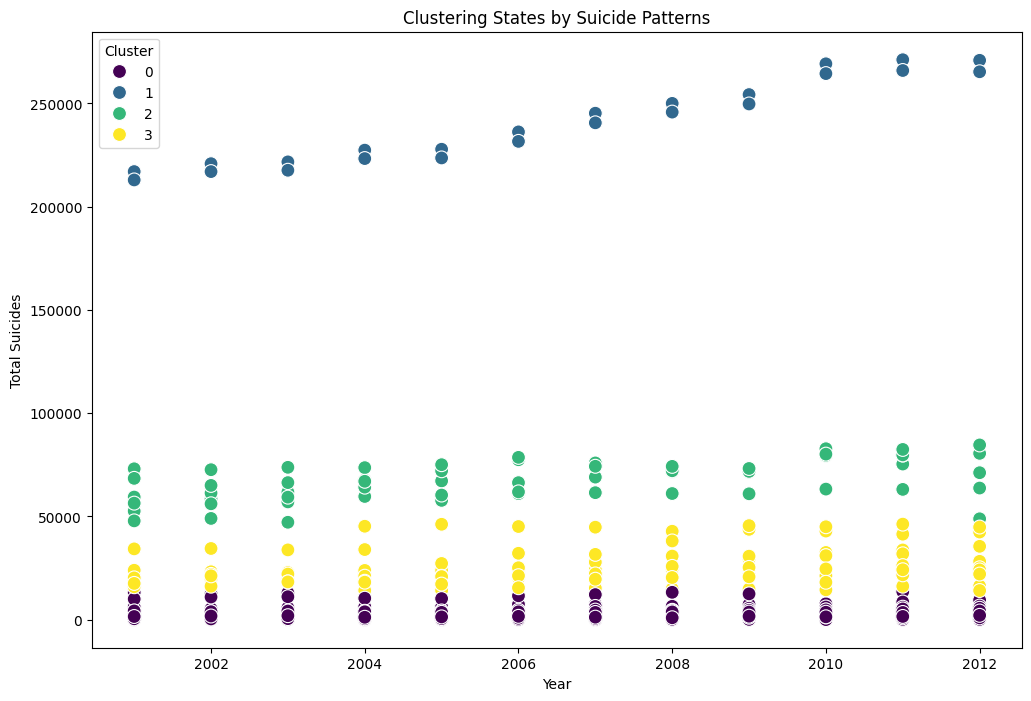

In [18]:
# Aggregate data by State and Year
df_state_year = df.groupby(['State', 'Year']).sum().reset_index()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_state_year[['Total']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
df_state_year['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_state_year, x='Year', y='Total', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering States by Suicide Patterns')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(title='Cluster')
plt.show()

# STATES WHICH FALLS INTO THE EACH CLUSTER 

In [19]:
# Display states in each cluster
for cluster in df_state_year['Cluster'].unique():
    states_in_cluster = df_state_year[df_state_year['Cluster'] == cluster]['State'].unique().tolist()
    print(f"Cluster {cluster}: {states_in_cluster}")

Cluster 0: ['A & N Islands', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'D & N Haveli', 'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Lakshadweep', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry', 'Punjab', 'Sikkim', 'Total (Uts)', 'Tripura', 'Uttarakhand']
Cluster 2: ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Tamil Nadu', 'West Bengal']
Cluster 3: ['Assam', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Kerala', 'Madhya Pradesh', 'Odisha', 'Rajasthan', 'Uttar Pradesh', 'West Bengal']
Cluster 1: ['Total (All India)', 'Total (States)']


# QUESTIONS / ANSWERS 

## 1. Which states have the highest and lowest suicide rates over the years?

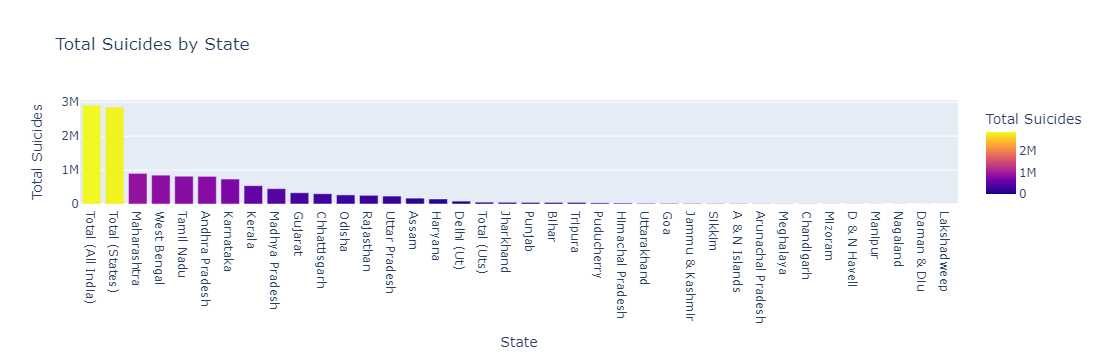

In [20]:
# Find total suicides per state over the years
state_total_suicides = df_state_year.groupby('State')['Total'].sum().reset_index()

# Sorting states by total suicides
state_total_suicides_sorted = state_total_suicides.sort_values(by='Total', ascending=False)

# Plotting the states with the highest and lowest suicide rates
fig = px.bar(state_total_suicides_sorted, x='State', y='Total', 
             title='Total Suicides by State',
             labels={'Total': 'Total Suicides', 'State': 'State'},
             color='Total')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## 2. Has there been an increase or decrease in suicide rates over the years?

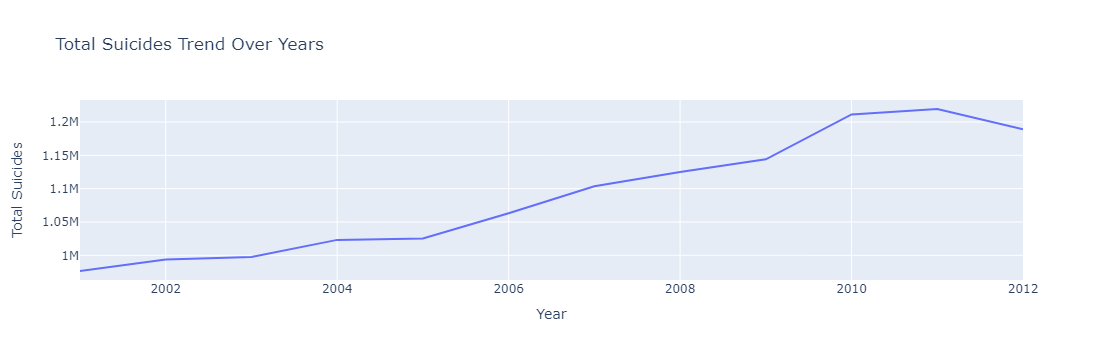

In [21]:
# Aggregate total suicides per year
yearly_total_suicides = df_state_year.groupby('Year')['Total'].sum().reset_index()

# Plotting the trend of suicide rates over the years
fig = px.line(yearly_total_suicides, x='Year', y='Total', 
              title='Total Suicides Trend Over Years',
              labels={'Total': 'Total Suicides', 'Year': 'Year'})
fig.show()


## 3. How do the suicide rates differ between males and females?


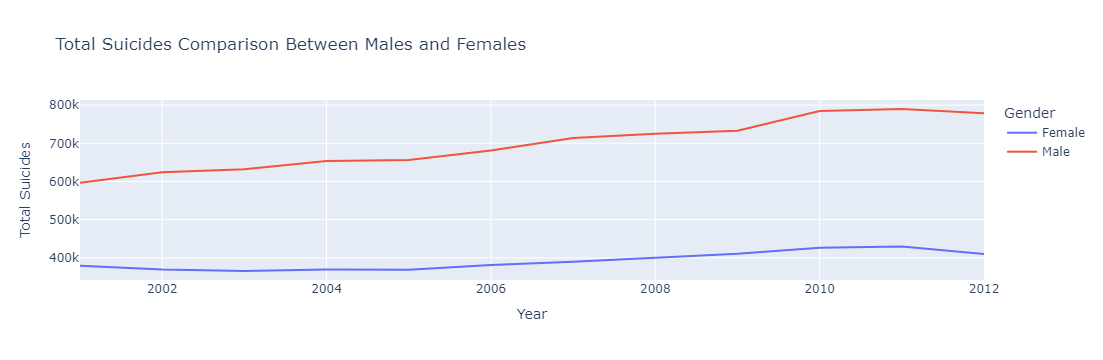

In [22]:
# Aggregate total suicides by gender and year
gender_yearly_total_suicides = df.groupby(['Year', 'Gender'])['Total'].sum().reset_index()

# Plotting the comparison of suicide rates between males and females over the years
fig = px.line(gender_yearly_total_suicides, x='Year', y='Total', 
              color='Gender', title='Total Suicides Comparison Between Males and Females',
              labels={'Total': 'Total Suicides', 'Year': 'Year', 'Gender': 'Gender'})
fig.show()


## 4. Which age group is most affected by suicides?

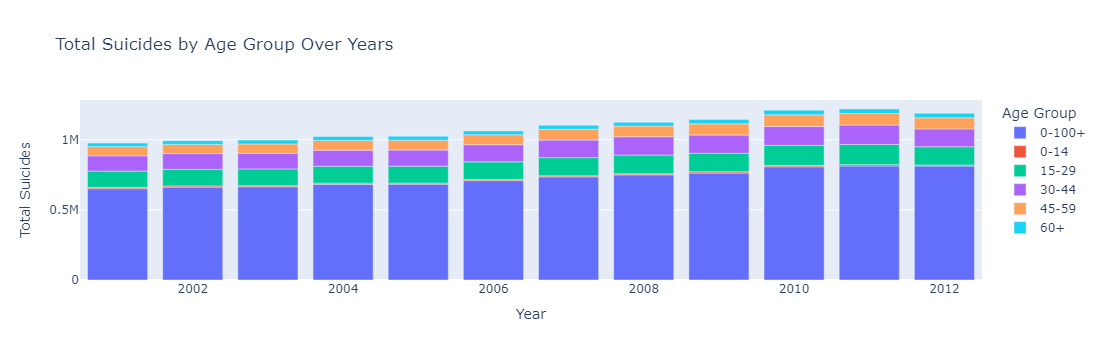

In [23]:
# Aggregate total suicides by age group and year
age_group_yearly_total_suicides = df.groupby(['Year', 'Age_group'])['Total'].sum().reset_index()

# Plotting the distribution of suicide rates across different age groups over the years
fig = px.bar(age_group_yearly_total_suicides, x='Year', y='Total', 
              color='Age_group', title='Total Suicides by Age Group Over Years',
              labels={'Total': 'Total Suicides', 'Year': 'Year', 'Age_group': 'Age Group'})
fig.show()

## 5. What Are The Top 10 Types of Suicides with Highest Occurrences in India?

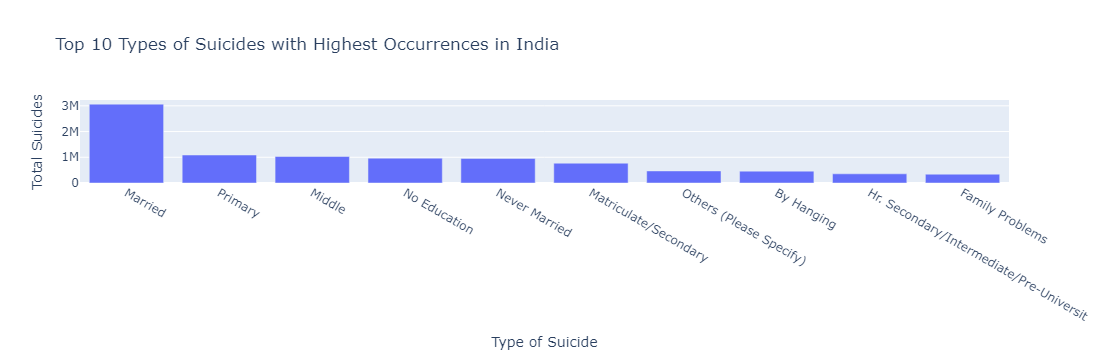

In [24]:

# Aggregate total suicides by type code and type
type_total_suicides = df.groupby(['Type_code', 'Type'])['Total'].sum().reset_index()

# Sort by total suicides to find the types with the highest occurrences
type_total_suicides_sorted = type_total_suicides.sort_values(by='Total', ascending=False)

# Plotting the types with the highest occurrences
fig = px.bar(type_total_suicides_sorted.head(10), x='Type', y='Total', 
             title='Top 10 Types of Suicides with Highest Occurrences in India',
             labels={'Total': 'Total Suicides', 'Type': 'Type of Suicide'})
fig.show()

# *THANK YOU SO MUCH*

# **I HOPE YOU LIKE IT**